# Project: Predicting Housing Prices

## Project Overview

...

In [116]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [48]:
# Load data

data = pd.read_csv('AmesHousing.txt', delimiter="\t")

## Exploratory data analysis

In [49]:
# Look at the data set
print(data.columns)
data.describe()
print(data.dtypes)
# Analyze the distribution of important features

# Analyze the correlation between various columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [71]:
data.select_dtypes(include=['int64','float64']).columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [ ]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cols_to_analyze = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition']
count_unique(data, cols_to_analyze)

In [ ]:
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of houses by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of houses')# Set text for y axis
        #ax.margins(0.05)
    plt.show()

def plot_bars_grid(df, cols):
    fig = plt.figure(figsize=(16,16))
    current_row = 1
    current_column = 1
    total_figures = 1
    for col in cols:
        ax = fig.add_subplot(4,4,total_figures)
        #fig = plt.figure(figsize=(12,12)) # define plot area
        #ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of houses by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of houses')# Set text for y axis
        ax.margins(0.05)   
        if current_column == 4:
            current_column = 1
            current_row += 1
        else:
            current_column += 1
        total_figures += 1
    plt.show()

plot_cols = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style']
plot_cols_all = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice']
plot_bars(data, plot_cols_all)    

## Model Selection

* Based on the question that we want to answer (predicting housing prices) and the nature of the data set (multiple features are strongly correlated with the target column), this data set would likely be a good candidate for linear regression.

## Feature Engineering

In [144]:
# Functions to transform features

def remove_missing_values(df,threshold=.25):
    total_rows = len(df)
    # df_null_counts is now a series with indexes of column names and values of the number of null rows in that column
    df_null_counts = df.isnull().sum()

    # get a list of all columns with between 1 and the threshold percentage of null values - these are candidates for imputing the missing values
    # columns/features that have more than the threshold percentage of null values will be dropped
    cols_to_keep = df_null_counts[(df_null_counts >= 0) & (df_null_counts < (threshold*total_rows))].index
    col_diff = len(df.columns)-len(cols_to_keep)
    print("Removing %d features because of excess null values" % col_diff)
    #print("Keeping %s " % list(cols_to_keep))
    #print(df_null_counts)
    return df[cols_to_keep]

def impute_missing_values(df,threshold=.05,statistic='mode'):
    total_rows = len(df)
    df_null_counts = df.isnull().sum()
    cols_to_impute = df_null_counts[(df_null_counts > 0) & (df_null_counts < (threshold*total_rows))].copy().index
    print("Imputing values for "+str(len(cols_to_impute))+" columns")
    for col in cols_to_impute:
        if statistic == 'mode':
            df[col] = df[col].fillna(df[col].mode(),inplace=True)
        elif statistic == 'median':
            df[col] = df[col].fillna(df[col].mean(),inplace=True)
    return df

def convert_categorical_vars(df):
    text_cols = df.select_dtypes(include=['object']).columns
    print(" %d features to be converted from text to categorical" % len(text_cols))
    #print(df.dtypes)
    for col in text_cols:
        cat_col = pd.Categorical(df[col])
        df[col] = cat_col.codes
    return df

def scale_numeric_vars(df):
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    print(" %d features to be scaled" % len(numeric_cols))
    #print(df.dtypes)
    for col in numeric_cols:
        col_mean = df[col].mean()
        col_range = df[col].max()-df[col].min()
        df[col] = df[col].apply(lambda x: (float(x)-col_mean)/col_range)
    return df
        
def encode_categorical_cols(df):
    categorical_cols = df.select_dtypes(include=['category']).columns
    print(" %d categorical eatures to be encoded with one-hot encoding" % len(categorical_cols))
    dummy_cols = pd.DataFrame()
    dummy_cols = pd.get_dummies(df, columns=categorical_cols)
    return dummy_cols

def transform_features(df):
    # Perform some basic feature engineering tasks on the data set:
    # 1. Remove features with more than X% missing values
    # 2. Impute values for features where fewer than Y% of the rows have mssing values
    # 3. Convert string/object data in the data frame to categorical type
    # 4. Convert cetegorical features to a one-hot encoding or dummy encoding
    print("Beginning transformation with "+str(len(df.columns))+" features/columns")
    #print(df.columns)
    new_df = remove_missing_values(df)
    new_df = impute_missing_values(new_df)
    new_df = scale_numeric_vars(new_df)
    new_df = convert_categorical_vars(new_df)
    new_df = encode_categorical_cols(new_df)
    #training_rows = len(new_df)*training_rate
    print("Concluding transformation with "+str(len(new_df.columns))+" features/columns")
    #print(new_df.columns)
    #return new_df[:training_rows]
    return new_df

In [90]:
# View correlations between remaining features and the target variable

# calculate the correlation matrix
corr = transformed_df.corr()
sale_price_corr = corr['SalePrice']
print(sale_price_corr[sale_price_corr > .5].sort_values(ascending=False))
#fig = plt.figure(figsize=(16,16)) # define plot area
#ax = fig.add_subplot(1,1,1)
# plot the heatmap
#sns.heatmap(corr, ax=ax, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
Name: SalePrice, dtype: float64


In [101]:
# Function to select features

def select_features(df, columns=['Gr Liv Area']):
    return df[columns]



In [197]:
# Function to test the model with the test set

def set_fold_number(df,k):
    rows_per_fold = int(len(df)/k)
    df['fold'] = 1
    for i in range(0,len(df)-1):
        df.loc[i, 'fold'] = int((i+1)/rows_per_fold)+1

def train_and_test(df, training_rate=.5, target_column='SalePrice',k=0):
    total_rows = len(df)    
    if k == 0:
        #perform holdout validation (k=2)
        num_training_rows = int(total_rows*training_rate)
        shuffled_index = np.random.permutation(df.index)
        df = df.reindex(shuffled_index).copy()
        train = df[:num_training_rows].copy()
        test = df[num_training_rows:].copy()
        feature_cols = list(df.columns)
        if target_column in feature_cols:
            feature_cols.remove(target_column)
        lr = LinearRegression()
        lr.fit(train[feature_cols],train[target_column])
        test_predictions = lr.predict(test[feature_cols])
        evaluate_model(test_predictions,test[target_column].to_numpy(),feature_cols)
        return   
    elif k == 1:
        # Perform k-cross-fold validation where k=3
        # Shuffle the original dataset
        # Split dataset into two parts (50/50 split)
        # Train the model on one part, predict labels on the other part
        # Assess the error
        # Switch training and test sets and repeat
        num_folds = 3
        shuffled_index = np.random.permutation(df.index)
        df = df.reindex(shuffled_index).copy()
        set_fold_number(df, num_folds)
        for i in range(1,num_folds+1):
            print("K-Fold validation - Test fold:"+str(i))
            feature_cols = list(df.columns)
            if target_column in feature_cols:
                feature_cols.remove(target_column)
            lr = LinearRegression()
            train = df.loc[df['fold'] != i].copy()
            test = df.loc[df['fold'] == i].copy()
            lr.fit(train[feature_cols],train[target_column])
            test_predictions = lr.predict(test[feature_cols])
            evaluate_model(test_predictions,test[target_column].to_numpy(),feature_cols)
        return   
    elif k>1:
        #perform k-cross-fold validation
        #test_rmse = 0
        return
    return



In [180]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def evaluate_model(predictions, actuals, features):
    #y_score = lin_mod.predict(x_test) 
    print_metrics(actuals, predictions, len(features)) 
    hist_resids(actuals, predictions)  
    resid_qq(actuals, predictions)  
    resid_plot(actuals, predictions) 

In [87]:
train_and_test(transformed_df,k=1)

0.06675562975369358

In [191]:
transformed_df = transform_features(data)

# Perform some feature engineering tasks specific to this data set:
# ensure that dates are meaningful
# any features that arent useful:
## - those with low variance, 
## - those having 95% or more of the values in one category 
## - having hundreds of unique values (categories)
# any columns that might leak information about the target variable
transformed_df['years_until_remod'] = transformed_df['Year Remod/Add'] - transformed_df['Year Built']
#Overall Qual      0.799262
#Gr Liv Area       0.706780
#Garage Cars       0.647877
#Garage Area       0.640401
#Total Bsmt SF     0.632280
#1st Flr SF        0.621676
#Year Built        0.558426
#Full Bath         0.545604
#Year Remod/Add    0.532974
#Garage Yr Blt     0.526965
#Mas Vnr Area      0.508285

feature_sets = [['Gr Liv Area','SalePrice'],
                ['Overall Qual','SalePrice'],
                ['Overall Qual','Gr Liv Area','SalePrice'],
                ['Overall Qual','Gr Liv Area','Garage Cars','SalePrice'],
                ['Overall Qual','Gr Liv Area','Garage Cars','Total Bsmt SF','SalePrice'],
               ['Overall Qual','Gr Liv Area','Garage Cars','Total Bsmt SF','1st Flr SF','SalePrice'],
               ['Overall Qual','Gr Liv Area','Garage Cars','Total Bsmt SF','1st Flr SF','years_until_remod','Full Bath','SalePrice']]

Beginning transformation with 82 features/columns
Removing 5 features because of excess null values
Imputing values for 16 columns


C:\Users\hrasheed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 30 features to be scaled


C:\Users\hrasheed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 47 features to be converted from text to categorical


C:\Users\hrasheed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 0 categorical eatures to be encoded with one-hot encoding
Concluding transformation with 77 features/columns


Results for features ['Gr Liv Area', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.006511833093853566
Root Mean Square Error = 0.08069592984688612
Mean Absolute Error    = 0.05922826684715535
Median Absolute Error  = 0.0434541921697868
R^2                    = 0.4254434718489325
Adjusted R^2           = 0.4248535780828636


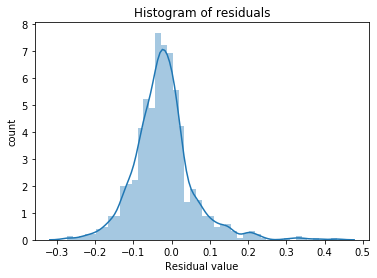

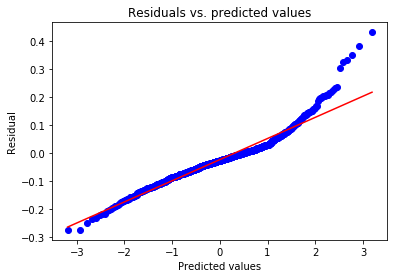

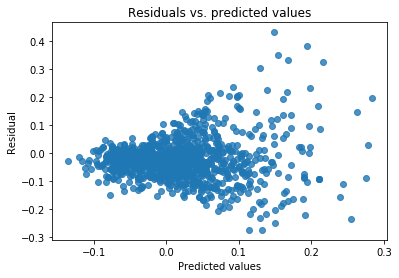

K-Fold validation - Test fold:2
Mean Square Error      = 0.006196306106964732
Root Mean Square Error = 0.07871661900110251
Mean Absolute Error    = 0.051883552941851485
Median Absolute Error  = 0.034344557200184346
R^2                    = 0.5139902651796535
Adjusted R^2           = 0.5134912818790166


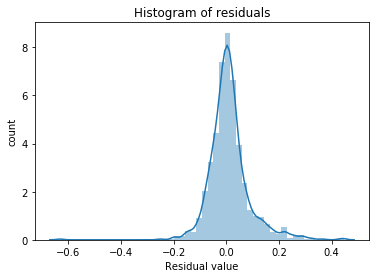

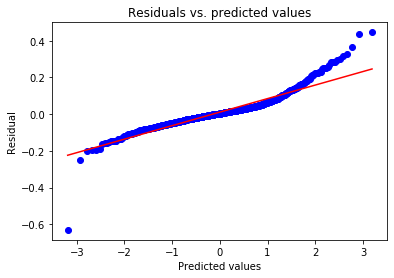

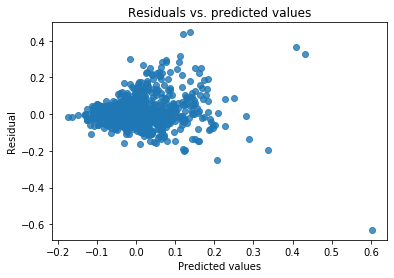

K-Fold validation - Test fold:3
Mean Square Error      = 0.005781637739935268
Root Mean Square Error = 0.07603708134808482
Mean Absolute Error    = 0.05307892361310223
Median Absolute Error  = 0.0377895579363173
R^2                    = 0.4500532422418173
Adjusted R^2           = 0.44948861518046396


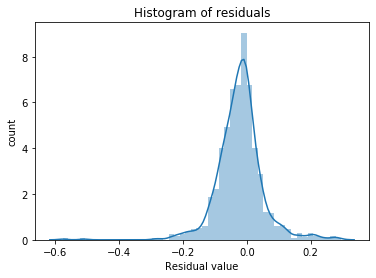

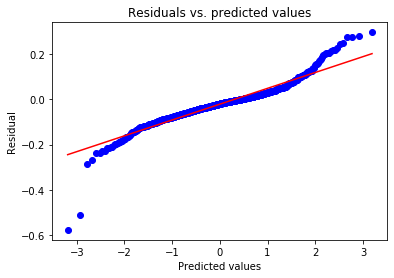

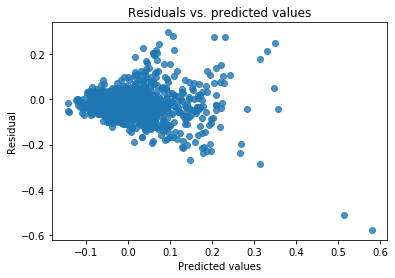

Results for features ['Overall Qual', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.004018108317044177
Root Mean Square Error = 0.0633885503623815
Mean Absolute Error    = 0.0454919826085526
Median Absolute Error  = 0.03508300304855925
R^2                    = 0.6454715083906379
Adjusted R^2           = 0.6451075160994579


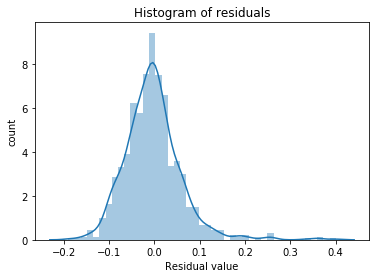

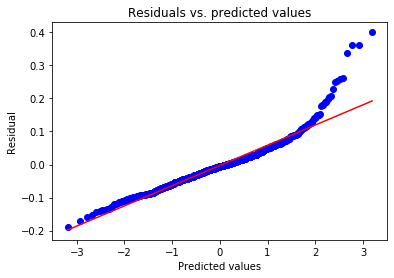

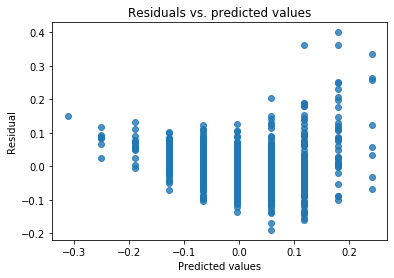

K-Fold validation - Test fold:2
Mean Square Error      = 0.0046866044224495515
Root Mean Square Error = 0.0684587790020356
Mean Absolute Error    = 0.046402491521903996
Median Absolute Error  = 0.032203598122141366
R^2                    = 0.6324043174686991
Adjusted R^2           = 0.6320269091704123


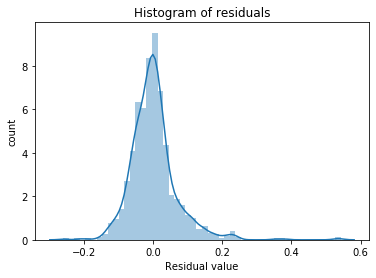

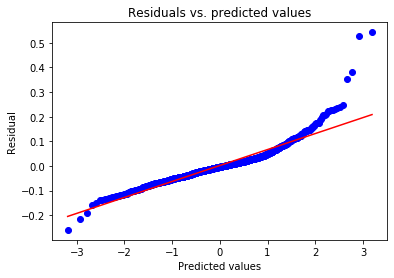

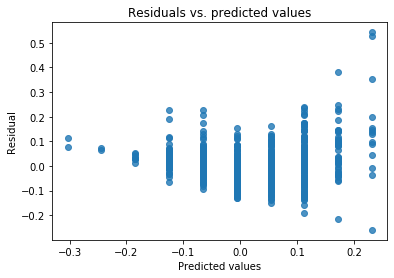

K-Fold validation - Test fold:3
Mean Square Error      = 0.003905200583740943
Root Mean Square Error = 0.06249160410599926
Mean Absolute Error    = 0.04523366117138693
Median Absolute Error  = 0.03368314401160856
R^2                    = 0.6285390928958929
Adjusted R^2           = 0.6281577161945541


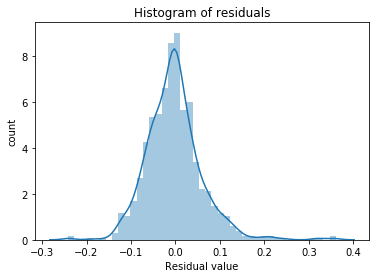

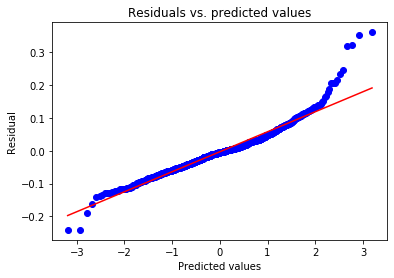

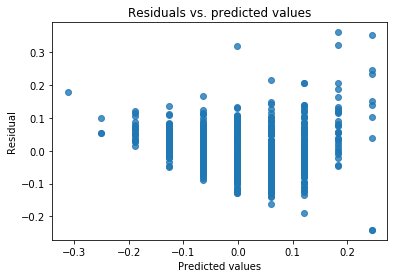

Results for features ['Overall Qual', 'Gr Liv Area', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.0030530825911195534
Root Mean Square Error = 0.055254706506500904
Mean Absolute Error    = 0.03969057365653749
Median Absolute Error  = 0.031194634737775354
R^2                    = 0.7306183207662598
Adjusted R^2           = 0.7300646071398801


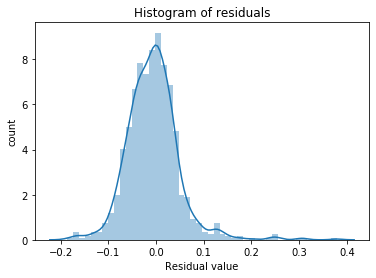

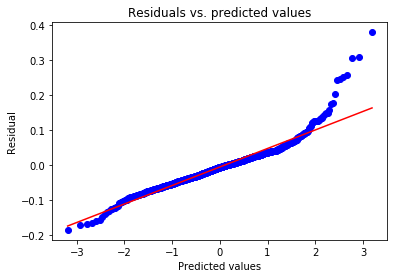

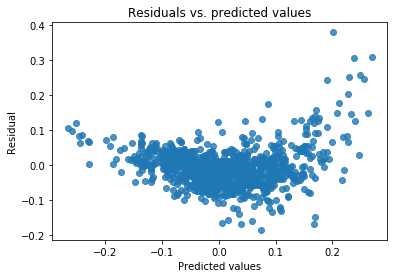

K-Fold validation - Test fold:2
Mean Square Error      = 0.0033919479749931884
Root Mean Square Error = 0.05824043247601436
Mean Absolute Error    = 0.038105578943668596
Median Absolute Error  = 0.027039429200050986
R^2                    = 0.7339512110291175
Adjusted R^2           = 0.7334043481535351


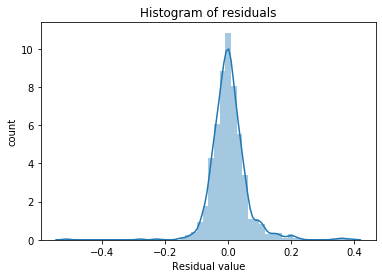

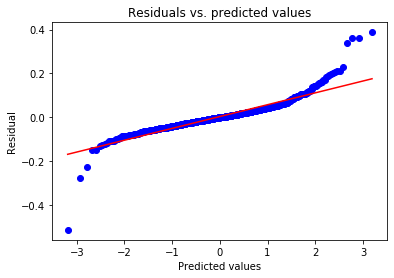

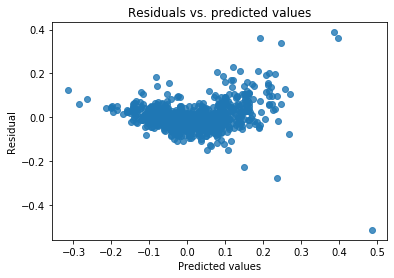

K-Fold validation - Test fold:3
Mean Square Error      = 0.0030171030791111874
Root Mean Square Error = 0.0549281628958332
Mean Absolute Error    = 0.03934015863476099
Median Absolute Error  = 0.029957982522092932
R^2                    = 0.7130145244627512
Adjusted R^2           = 0.712424626260208


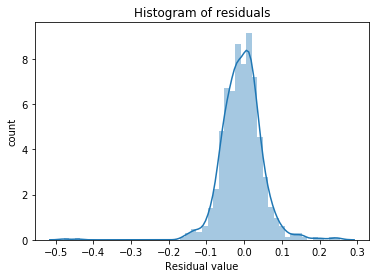

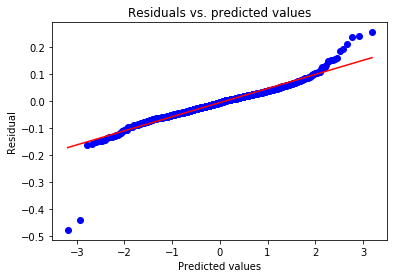

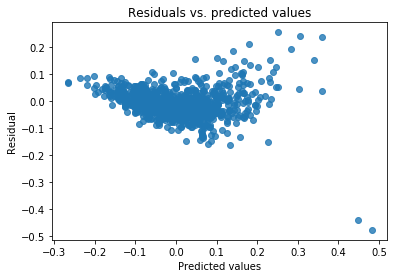

Results for features ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.003053082591119556
Root Mean Square Error = 0.055254706506500925
Mean Absolute Error    = 0.039690573656537505
Median Absolute Error  = 0.031194634737775555
R^2                    = 0.7306183207662595
Adjusted R^2           = 0.7297868958303529


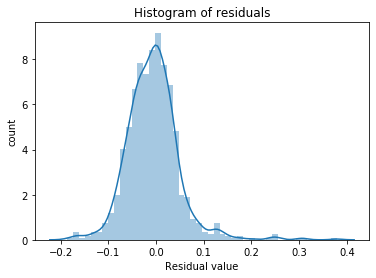

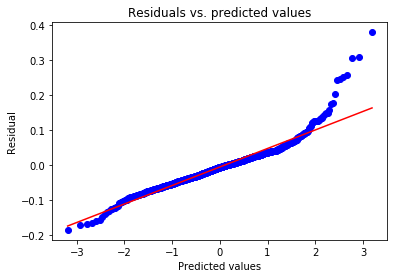

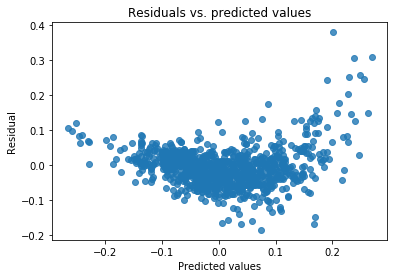

K-Fold validation - Test fold:2
Mean Square Error      = 0.003391947974993189
Root Mean Square Error = 0.05824043247601437
Mean Absolute Error    = 0.03810557894366859
Median Absolute Error  = 0.027039429200050917
R^2                    = 0.7339512110291174
Adjusted R^2           = 0.733130072791553


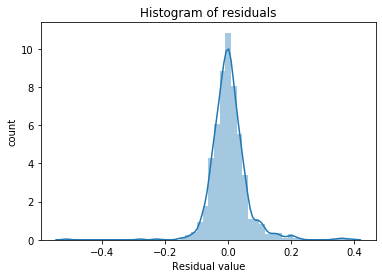

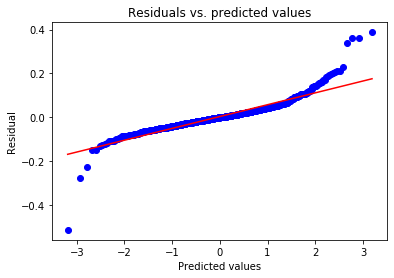

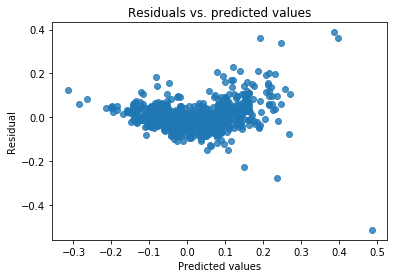

K-Fold validation - Test fold:3
Mean Square Error      = 0.0030171030791111856
Root Mean Square Error = 0.05492816289583319
Mean Absolute Error    = 0.039340158634760966
Median Absolute Error  = 0.02995798252209283
R^2                    = 0.7130145244627513
Adjusted R^2           = 0.7121287668222042


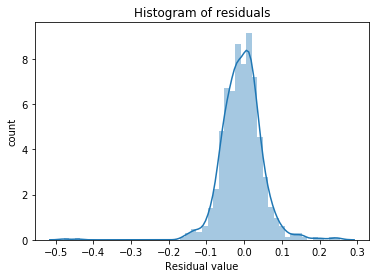

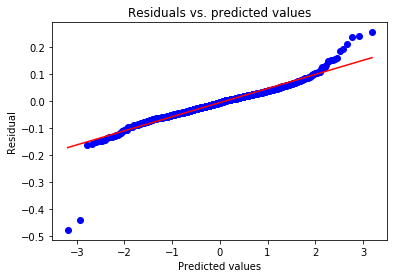

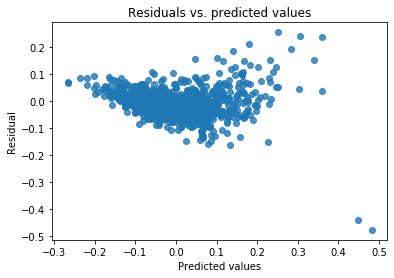

Results for features ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.0030530825911195543
Root Mean Square Error = 0.05525470650650091
Mean Absolute Error    = 0.039690573656537505
Median Absolute Error  = 0.031194634737775458
R^2                    = 0.7306183207662598
Adjusted R^2           = 0.7295086125098901


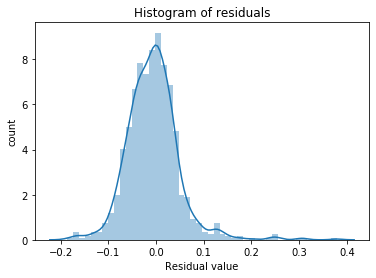

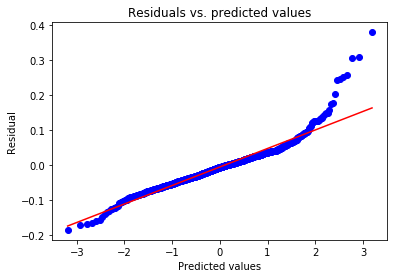

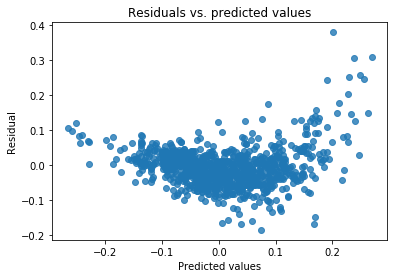

K-Fold validation - Test fold:2
Mean Square Error      = 0.00339194797499319
Root Mean Square Error = 0.058240432476014375
Mean Absolute Error    = 0.03810557894366859
Median Absolute Error  = 0.02703942920005089
R^2                    = 0.7339512110291173
Adjusted R^2           = 0.7328552324957666


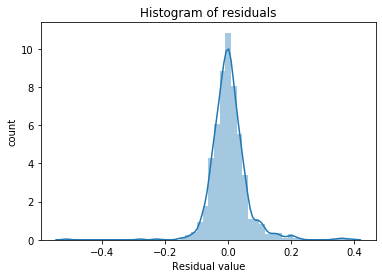

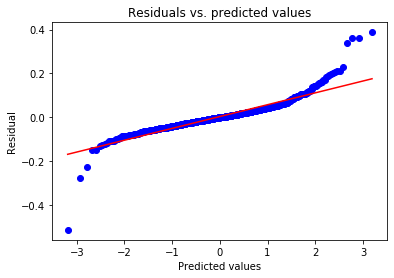

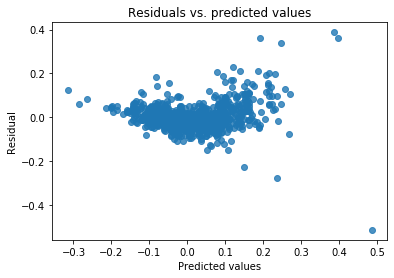

K-Fold validation - Test fold:3
Mean Square Error      = 0.0030171030791111865
Root Mean Square Error = 0.054928162895833195
Mean Absolute Error    = 0.03934015863476097
Median Absolute Error  = 0.029957982522092877
R^2                    = 0.7130145244627513
Adjusted R^2           = 0.7118322979929789


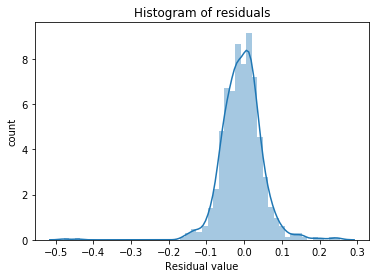

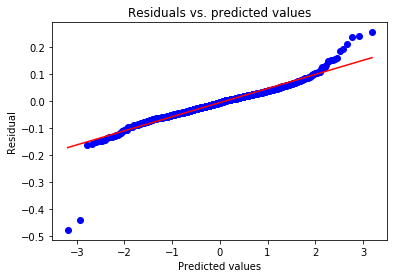

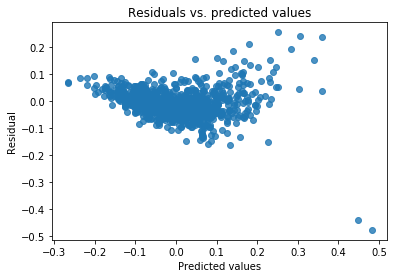

Results for features ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.0025956700891088804
Root Mean Square Error = 0.050947719174746976
Mean Absolute Error    = 0.036430466323061635
Median Absolute Error  = 0.027857561594999237
R^2                    = 0.7709770546742599
Adjusted R^2           = 0.7697965240282509


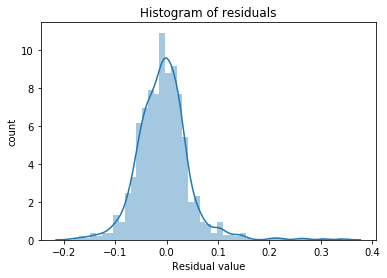

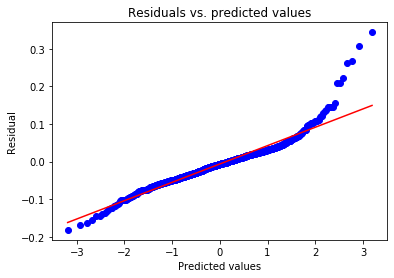

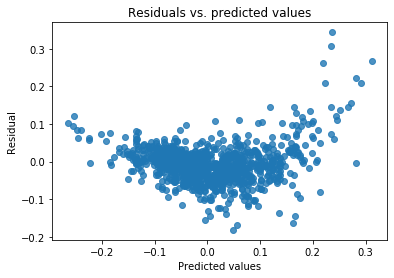

K-Fold validation - Test fold:2
Mean Square Error      = 0.003064171101829682
Root Mean Square Error = 0.05535495553091595
Mean Absolute Error    = 0.03602875398437635
Median Absolute Error  = 0.026251192735980432
R^2                    = 0.7596605204880836
Adjusted R^2           = 0.7584216571916305


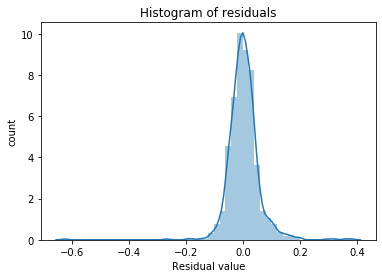

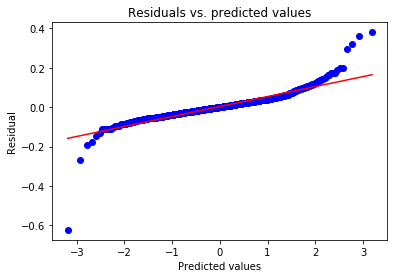

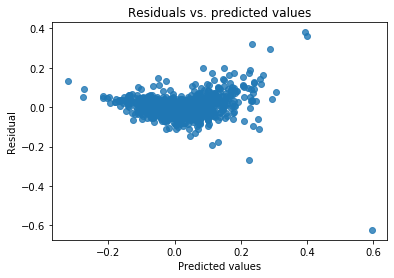

K-Fold validation - Test fold:3
Mean Square Error      = 0.0029182336193927473
Root Mean Square Error = 0.054020677702086885
Mean Absolute Error    = 0.036181086590286314
Median Absolute Error  = 0.026931525590775607
R^2                    = 0.7224189425980991
Adjusted R^2           = 0.7209881124053058


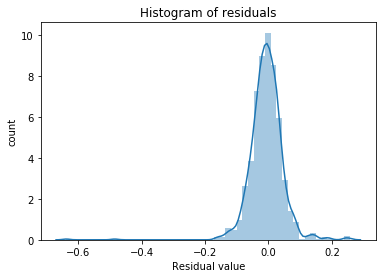

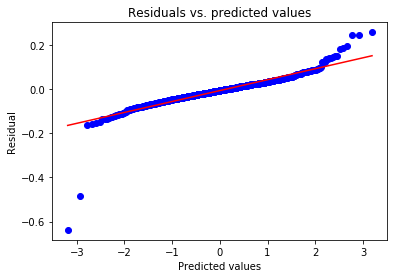

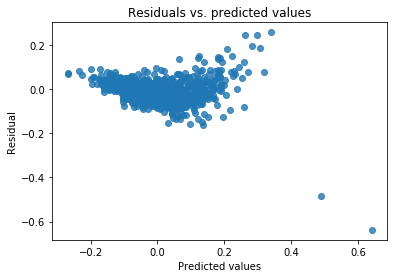

Results for features ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'years_until_remod', 'Full Bath', 'SalePrice']
K-Fold validation - Test fold:1
Mean Square Error      = 0.0025812412764056217
Root Mean Square Error = 0.05080591773017806
Mean Absolute Error    = 0.03622190173250067
Median Absolute Error  = 0.027700292924853293
R^2                    = 0.7722501475826072
Adjusted R^2           = 0.770603196170498


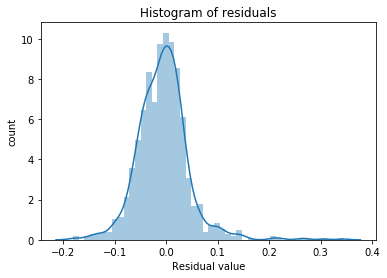

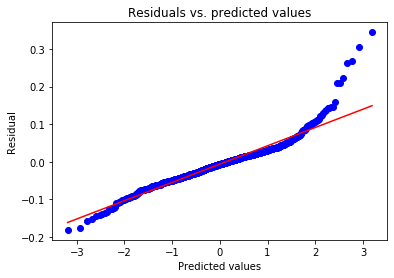

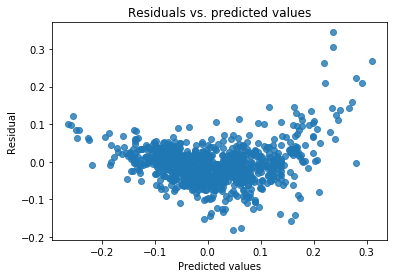

K-Fold validation - Test fold:2
Mean Square Error      = 0.003058349602874367
Root Mean Square Error = 0.0553023471732834
Mean Absolute Error    = 0.03597528846247393
Median Absolute Error  = 0.02591106263921136
R^2                    = 0.7601171320748401
Adjusted R^2           = 0.7583824419142243


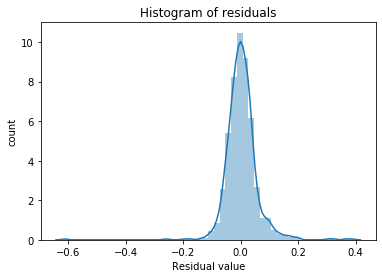

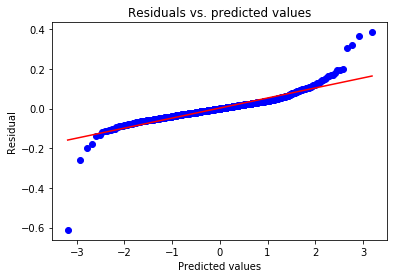

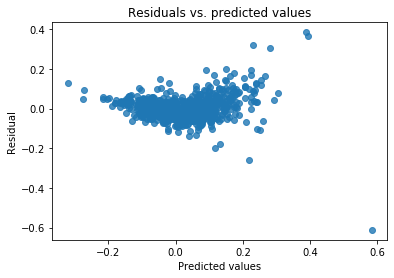

K-Fold validation - Test fold:3
Mean Square Error      = 0.0029201555615037617
Root Mean Square Error = 0.05403846372264631
Mean Absolute Error    = 0.036397334682612484
Median Absolute Error  = 0.02744343554648031
R^2                    = 0.7222361283367955
Adjusted R^2           = 0.7202275052979087


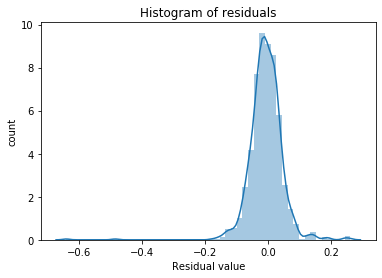

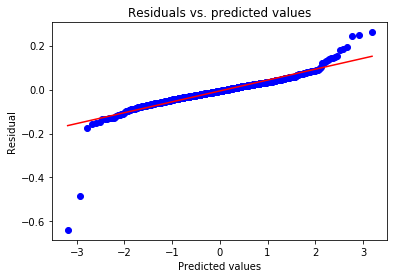

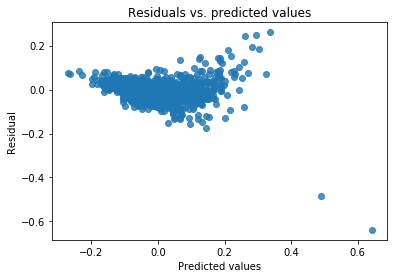

In [198]:
for feature_set in feature_sets:
    feature_df = select_features(transformed_df,feature_set)
    print("Results for features "+str(feature_set))
    train_and_test(feature_df,k=1)